In [22]:
# Load app functions
import app_functions as af
import os

# Load the test image paths
test_image_paths = os.listdir('../data/test-images/')

test_image_paths[:10]

['rodman.jpg',
 'bolt.jpg',
 'lance.jpg',
 'hamm.jpg',
 'tiger.jpg',
 'ali.jpg',
 'the-catch.jpg',
 'jokic.jpg',
 'tyler-adams.jpg',
 'jordan.jpg']

In [23]:
# Get results on Rodman
rodman = af.get_all_results('../data/test-images/rodman.jpg', k=5)

rodman

Deep Lake Dataset in ../data/vector_stores/threshold_vs already exists, loading from the storage
Deep Lake Dataset in ../data/vector_stores/segmented_edge_vs already exists, loading from the storage
Deep Lake Dataset in ../data/vector_stores/dimmed_vs already exists, loading from the storage
Deep Lake Dataset in ../data/vector_stores/edge_vs already exists, loading from the storage
Error with edge_vs
Unable to read sample at index 70575 from chunk 'image/chunks/d6cd521dbbd34e91' in tensor image.
Deep Lake Dataset in ../data/vector_stores/raw_vs already exists, loading from the storage
Deep Lake Dataset in ../data/vector_stores/mask_vs already exists, loading from the storage
Error with mask_vs
Unable to read sample at index 19249 from chunk '_image_info/chunks/2270ef8171634aad' in tensor _image_info.


{'inputs': {'original_image': '../data/test-images/rodman.jpg',
  'edges': <PIL.Image.Image image mode=L size=500x320>,
  'dimmed': <PIL.Image.Image image mode=RGB size=500x320>,
  'threshold': <PIL.Image.Image image mode=1 size=500x320>,
  'mask': <PIL.Image.Image image mode=L size=812x520>,
  'segmented_edge': <PIL.Image.Image image mode=L size=500x320>},
 'results': {'threshold_vs': {'images': [array([[[102,  65,  57],
            [108,  70,  61],
            [105,  62,  55],
            ...,
            [ 94, 131, 173],
            [ 90, 127, 169],
            [ 83, 120, 162]],
    
           [[108,  71,  63],
            [113,  75,  66],
            [109,  66,  59],
            ...,
            [110, 147, 189],
            [105, 142, 184],
            [ 97, 134, 176]],
    
           [[104,  70,  61],
            [109,  72,  63],
            [101,  61,  53],
            ...,
            [115, 154, 197],
            [109, 148, 191],
            [101, 140, 183]],
    
           .

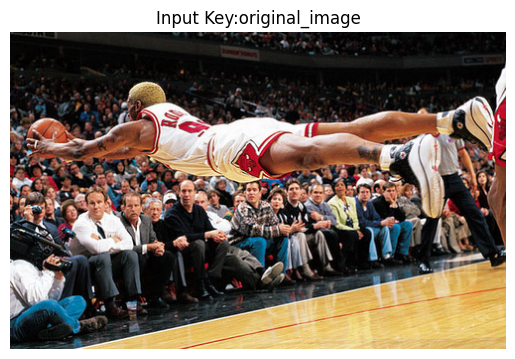

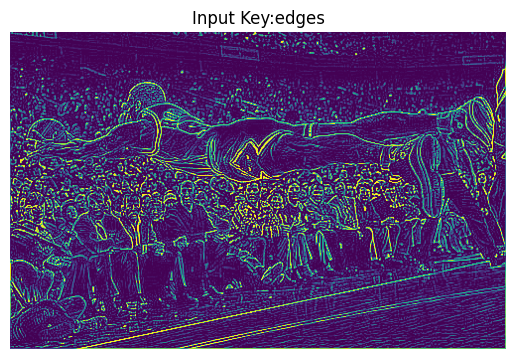

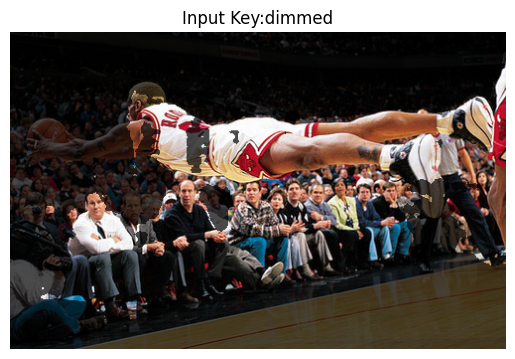

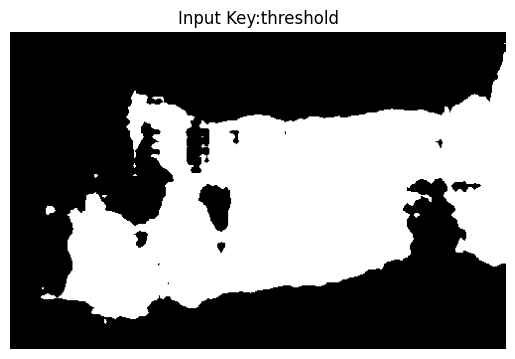

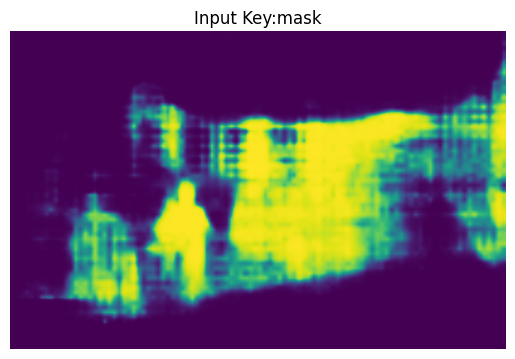

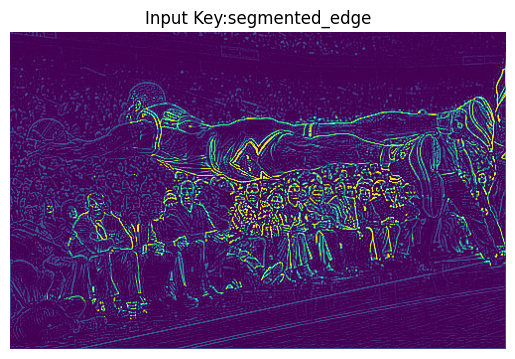

In [32]:
from matplotlib import pyplot as plt

# Get all input images
inputs = rodman['inputs'].keys()

for input in inputs:
    if input == 'original_image':
        img = plt.imread(rodman['inputs'][input])
        plt.imshow(img)
    else:
        plt.imshow(rodman['inputs'][input])

    plt.title("Input Key:" + input)
    plt.axis('off')
    plt.show()

# Results

In [4]:
# Print results options
rodman['results'].keys()

dict_keys(['threshold_vs', 'segmented_edge_vs', 'raw_vs'])

This should be all of the vector stores when they all work!

In [33]:
rodman['results']['segmented_edge_vs'].keys()

dict_keys(['images', 'similarities', 'labels'])

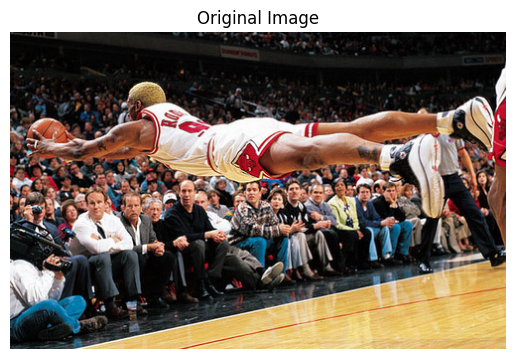

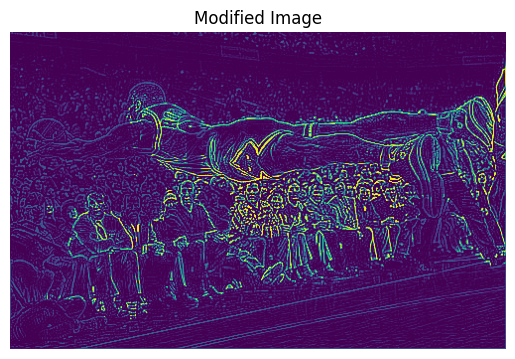

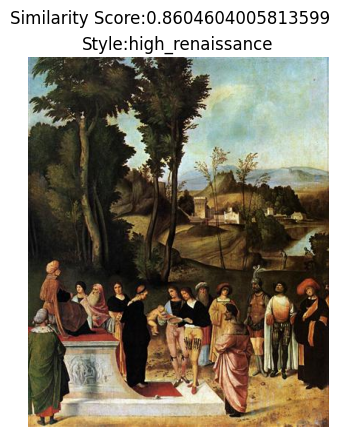

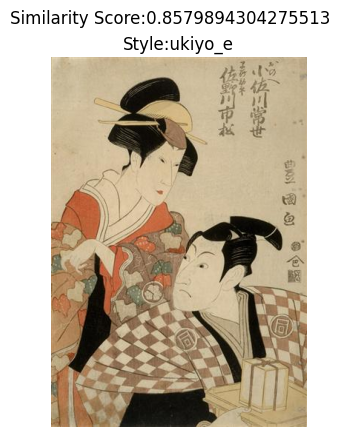

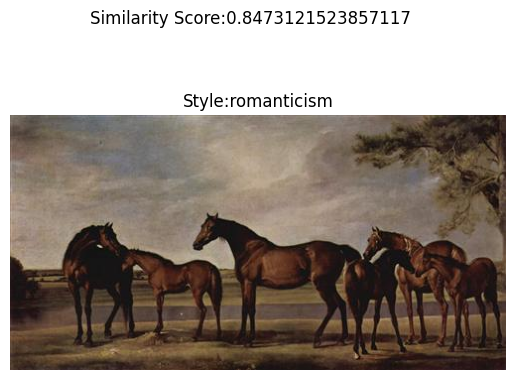

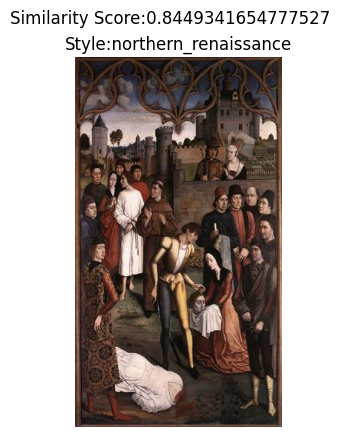

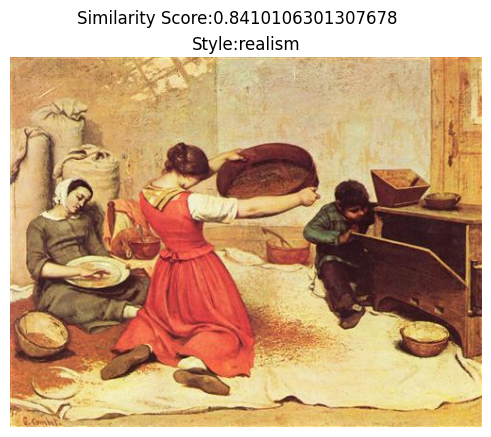

In [35]:
# If user has selected segmented edge as an example

# This should be the output of the dropdown
user_input = 'segmented_edge_vs'

# Get the results
results = rodman['results'][user_input]

# Show original image
original_img = plt.imread(rodman['inputs']['original_image'])
plt.imshow(original_img)
plt.title("Original Image")
plt.axis('off')
plt.show()

# Show the modified image if we want to
if user_input != 'raw_vs':
    input_minus_vs = user_input.split('_vs')[0]
    plt.imshow(rodman['inputs'][input_minus_vs])
    plt.title("Modified Image")
    plt.axis('off')
    plt.show()

# Show the results
for i in range(len(results['images'])):
    plt.imshow(results['images'][i])
    plt.title("Style:" + results['labels'][i])
    plt.suptitle("Similarity Score:" + str(results['similarities'][i]))
    plt.axis('off')
    plt.show()


Testing code from app_functions on bounding boxes to make sure they work.

style_northern_renaissance_index_46497_subject_box_5_333_491_565


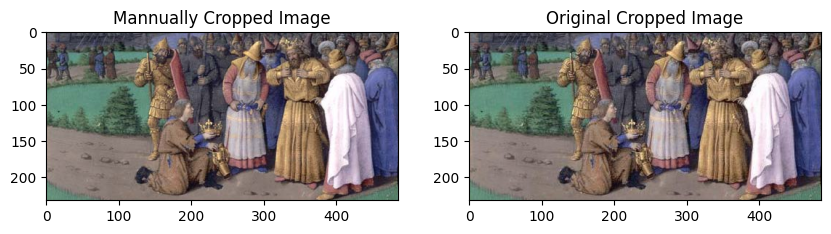

In [6]:
import deeplake
import matplotlib.pyplot as plt
ds = deeplake.load("hub://activeloop/wiki-art", read_only=True, verbose=False)


# Bounding box code test
crop = False

# Get image data
label = "../data/bounding-box-test/style_northern_renaissance_index_46497_subject_box_5_333_491_565.jpg"

# Get image index
name = label.split("/")[-1]

# Remove the .jpg
name = name.split(".")[0]
label = label.split("/")[-1]
label = label.split(".")[0]

# Split after index
name = name.split("index_")[-1]

# Check if bounding_box or subject_box is in the name
if "bounding_box" in name:
    name = name.split("_bounding_box")[0]

    # Get bounding box info
    coords = label.split("_bounding_box_")[-1].split("_")

    # Get the coordinates
    x1 = int(coords[0])
    y1 = int(coords[1])
    x2 = int(coords[2])
    y2 = int(coords[3])

    # Set crop to true
    crop = True

elif "subject_box" in name:
    name = name.split("_subject_box")[0]

    # Get bounding box info
    coords = label.split("_subject_box_")[-1].split("_")

    # Get the coordinates
    x1 = int(coords[0])
    y1 = int(coords[1])
    x2 = int(coords[2])
    y2 = int(coords[3])

    # Set crop to true
    crop = True

# Change name to int
name = int(name)

# Get image from ds
img = ds.images[name].numpy()

# If crop is true, crop the image
if crop:
    img = img[y1:y2, x1:x2]


# Get label
label = ds.labels[name].data()["text"][0]

# Make 2,1 plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Show image
ax[0].imshow(img)
ax[0].set_title("Mannually Cropped Image")

# Reading precropped image
cropped_image = plt.imread('../data/bounding-box-test/style_northern_renaissance_index_46497_subject_box_5_333_491_565.jpg')
ax[1].imshow(cropped_image)
ax[1].set_title("Original Cropped Image")

plt.show()
